<a href="https://colab.research.google.com/github/ayoabass777/rolling-stock-fleet/blob/main/fleet_reduction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fleet_df = pd.read_excel('/content/FA1 Scenario Dataset - Rolling Stock Fleet-Winter 2024.xlsx')

In [ ]:
fleet_df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2020 (km),HourMeter2020(hours),DowntimeHours2020(hours),LaborHours2020(hours)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [ ]:
fleet_df.isna().sum()

Equipment Number              0
Equipment Class               0
Equipment Category            0
Service Group                 0
Department                    0
Make                          0
Model                         0
Year                          0
Site                          0
Mileage2020 (km)            332
HourMeter2020(hours)        825
DowntimeHours2020(hours)    104
LaborHours2020(hours)       104
dtype: int64

In [ ]:
#dropping the hourmeter column due to high amount of missing values
fleet_df.drop(columns=['HourMeter2020(hours)'], inplace = True)

In [ ]:
fleet_df.isna().sum()

Equipment Number              0
Equipment Class               0
Equipment Category            0
Service Group                 0
Department                    0
Make                          0
Model                         0
Year                          0
Site                          0
Mileage2020 (km)            332
DowntimeHours2020(hours)    104
LaborHours2020(hours)       104
dtype: int64

In [ ]:
# Replace missing values in "DowntimeHours2020(hours)" and "LaborHours2020(hours)" with 0

fleet_df['DowntimeHours2020(hours)'].fillna(0, inplace=True)
fleet_df['LaborHours2020(hours)'].fillna(0, inplace=True)

In [ ]:
fleet_df.isna().sum()

Equipment Number              0
Equipment Class               0
Equipment Category            0
Service Group                 0
Department                    0
Make                          0
Model                         0
Year                          0
Site                          0
Mileage2020 (km)            332
DowntimeHours2020(hours)      0
LaborHours2020(hours)         0
dtype: int64

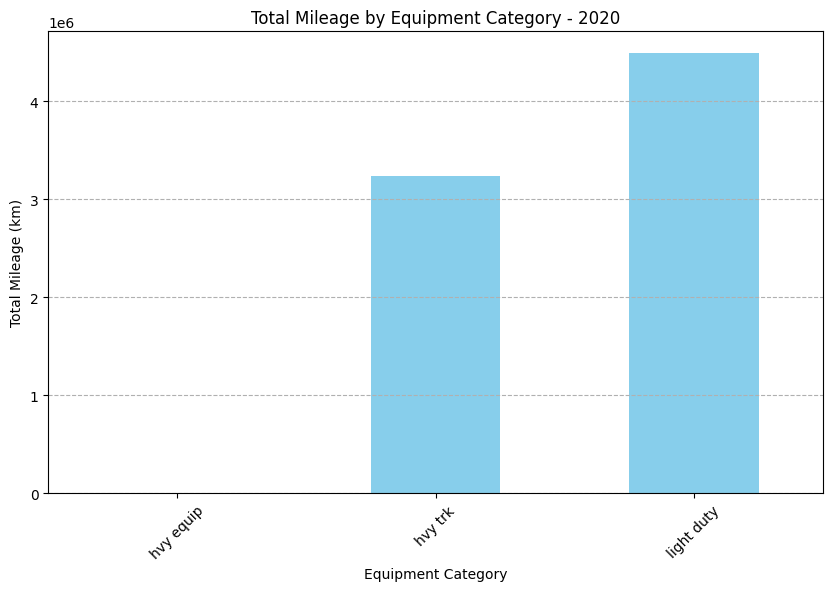

Equipment Category
hvy equip           0.0
hvy trk       3236107.0
light duty    4489212.0
Name: Mileage2020 (km), dtype: float64


In [ ]:
#checking the total mileage by category
total_mileage_by_category = fleet_df.groupby('Equipment Category')['Mileage2020 (km)'].sum()

total_mileage_by_category

# Plot the total mileage by equipment category
total_mileage_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Total Mileage by Equipment Category - 2020')
plt.xlabel('Equipment Category')
plt.ylabel('Total Mileage (km)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()
print(total_mileage_by_category)

In [ ]:
# Replace missing values in the "Mileage2020 (km)" column for the "Heavy Equipment" category with 0
# First, identify rows belonging to the "Heavy Equipment" category
is_heavy_equipment = fleet_df['Equipment Category'] == 'hvy equip'

# Replace missing values in these rows with 0
fleet_df.loc[is_heavy_equipment, 'Mileage2020 (km)'] = fleet_df.loc[is_heavy_equipment, 'Mileage2020 (km)'].fillna(0)

# Verify the operation by checking for missing values again
missing_values_after_filling_heavy_equipment = fleet_df.isnull().sum()
missing_values_after_filling_heavy_equipment

Equipment Number             0
Equipment Class              0
Equipment Category           0
Service Group                0
Department                   0
Make                         0
Model                        0
Year                         0
Site                         0
Mileage2020 (km)            74
DowntimeHours2020(hours)     0
LaborHours2020(hours)        0
dtype: int64

In [ ]:
# Identify rows where both DowntimeHours2020(hours) and LaborHours2020(hours) are 0
not_used_in_2020 = (fleet_df['DowntimeHours2020(hours)'] == 0) & (fleet_df['LaborHours2020(hours)'] == 0)

# Replace missing values in "Mileage2020 (km)" with 0 for these rows
fleet_df.loc[not_used_in_2020, 'Mileage2020 (km)'] = fleet_df.loc[not_used_in_2020, 'Mileage2020 (km)'].fillna(0)

# Verify the operation by checking for missing values again
missing_values_after_filling_not_used = fleet_df.isnull().sum()
missing_values_after_filling_not_used

Equipment Number             0
Equipment Class              0
Equipment Category           0
Service Group                0
Department                   0
Make                         0
Model                        0
Year                         0
Site                         0
Mileage2020 (km)            62
DowntimeHours2020(hours)     0
LaborHours2020(hours)        0
dtype: int64

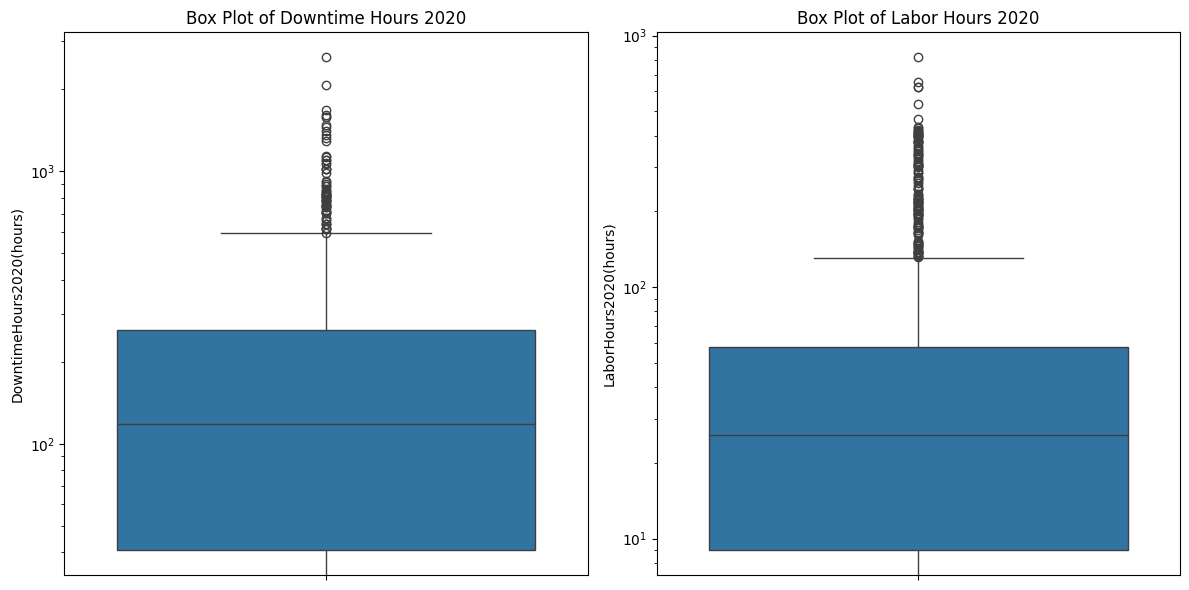

In [ ]:
# Plotting box plots for "DowntimeHours2020(hours)" and "LaborHours2020(hours)"
plt.figure(figsize=(12, 6))

# Box plot for "DowntimeHours2020(hours)"
plt.subplot(1, 2, 1)
sns.boxplot(y=fleet_df['DowntimeHours2020(hours)'])
plt.title('Box Plot of Downtime Hours 2020')
plt.yscale('log')

# Box plot for "LaborHours2020(hours)"
plt.subplot(1, 2, 2)
sns.boxplot(y=fleet_df['LaborHours2020(hours)'])
plt.title('Box Plot of Labor Hours 2020')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# Define a function to identify and return outliers' service groups for a given feature
def identify_outliers_service_groups(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outliers_service_groups = df.loc[outliers_condition, 'Service Group']

    return outliers_service_groups

# Identify service groups of outliers for "DowntimeHours2020(hours)"
outliers_downtime_service_groups = identify_outliers_service_groups(fleet_df, 'DowntimeHours2020(hours)')

# Identify service groups of outliers for "LaborHours2020(hours)"
outliers_labor_service_groups = identify_outliers_service_groups(fleet_df, 'LaborHours2020(hours)')

# Display the service groups of the outliers
print("Service Groups of Outliers in Downtime Hours 2020:")
print(outliers_downtime_service_groups.value_counts())
print("\nService Groups of Outliers in Labor Hours 2020:")
print(outliers_labor_service_groups.value_counts())


Service Groups of Outliers in Downtime Hours 2020:
Engineering Services    65
Parks & Recreation       2
Name: Service Group, dtype: int64

Service Groups of Outliers in Labor Hours 2020:
Engineering Services    122
Parks & Recreation        6
Name: Service Group, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder



# One-Hot Encode the categorical variables
categorical = fleet_df[['Equipment Category', 'Service Group']]
ohe = OneHotEncoder(sparse=False)
categorical_encoded = ohe.fit_transform(categorical)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out())

# Combine encoded categorical features with numerical features
X = pd.concat([fleet_df[['Year', 'DowntimeHours2020(hours)', 'LaborHours2020(hours)']], categorical_encoded_df], axis=1)
y = fleet_df['Mileage2020 (km)']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler





# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare the data for imputation, combining scaled features with unscaled 'Mileage2020 (km)'
X_scaled_with_mileage = np.hstack((X_scaled, fleet_df[['Mileage2020 (km)']].values))

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(X_scaled_with_mileage)

# Update the 'Mileage2020 (km)' in the dataset with imputed values
fleet_df['Mileage2020 (km)'] = imputed_data[:, -1]



In [ ]:
fleet_df.isna().sum()

Equipment Number            0
Equipment Class             0
Equipment Category          0
Service Group               0
Department                  0
Make                        0
Model                       0
Year                        0
Site                        0
Mileage2020 (km)            0
DowntimeHours2020(hours)    0
LaborHours2020(hours)       0
dtype: int64

In [ ]:
fleet_df.to_csv('fleet_no_missing.csv')

In [ ]:
fleet_df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,740.432781,102.75251
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,29.510834,4.07029
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,4.696111,3.21806
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,412.597220,54.35750
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,89.826946,15.17277


# Summary Statistics

In [ ]:
fleet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Equipment Number          1185 non-null   object 
 1   Equipment Class           1185 non-null   object 
 2   Equipment Category        1185 non-null   object 
 3   Service Group             1185 non-null   object 
 4   Department                1185 non-null   object 
 5   Make                      1185 non-null   object 
 6   Model                     1185 non-null   object 
 7   Year                      1185 non-null   int64  
 8   Site                      1185 non-null   object 
 9   Mileage2020 (km)          1185 non-null   float64
 10  DowntimeHours2020(hours)  1185 non-null   float64
 11  LaborHours2020(hours)     1185 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 111.2+ KB


In [ ]:
fleet_df.describe()

,Year,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours)
count,1185.000000,1185.000000,1185.000000,1185.000000
mean,2006.786498,7061.551899,197.244432,55.435636
std,4.963123,7817.005493,249.479792,87.892130
min,1940.000000,0.000000,0.000000,0.000000
25%,2003.000000,200.000000,40.551945,8.970550
50%,2006.000000,5598.000000,117.678054,25.720000
75%,2011.000000,10146.000000,261.813611,57.729170
max,2015.000000,64500.000000,2629.310007,822.157860


In [ ]:
fleet_df.describe(include= ['O'])

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Site
count,1185,1185,1185,1185,1185,1185,1185,1185
unique,1185,156,3,7,50,67,196,59
top,A0006,"TRUCK, PICKUP, HEAVY",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,F150,MANITOBA YD. (250 W. 70TH)
freq,1,72,549,807,210,548,68,374


# Visualization

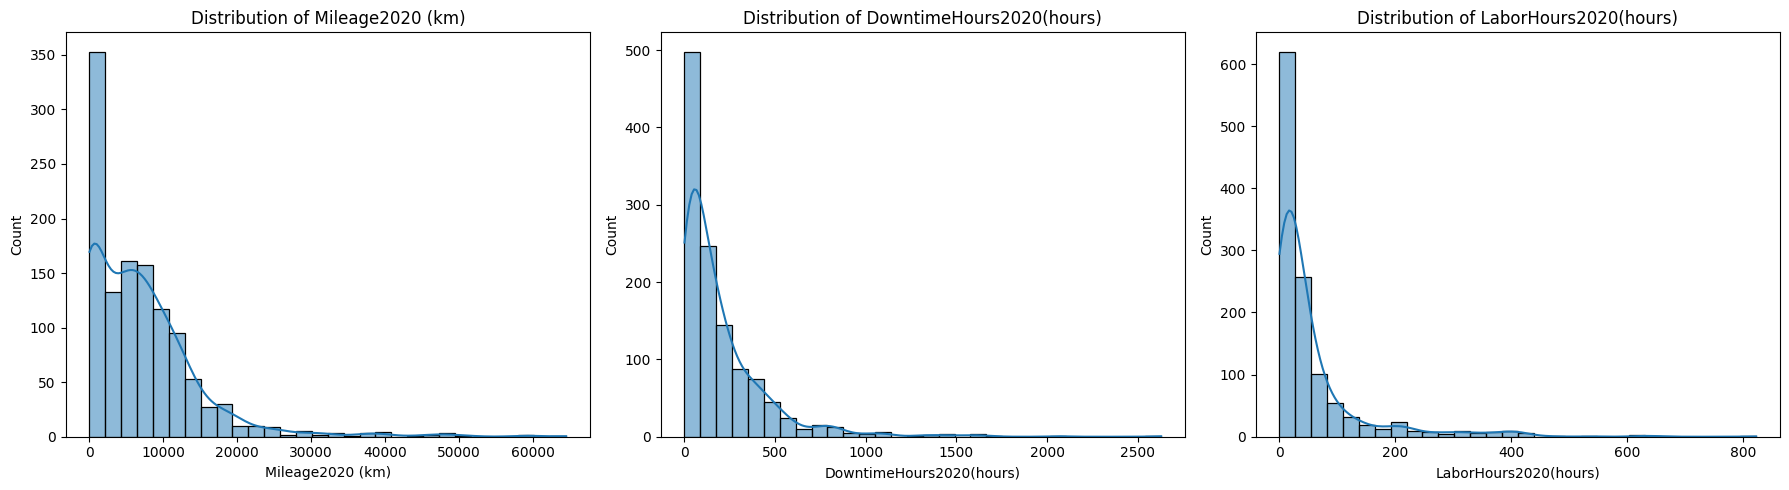

In [ ]:


# Setting up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plotting the distribution of Mileage2020 (km)
plt.subplot(1, 3, 1)
sns.histplot(fleet_df['Mileage2020 (km)'], bins=30, kde=True)
plt.title('Distribution of Mileage2020 (km)')

# Plotting the distribution of DowntimeHours2020(hours)
plt.subplot(1, 3, 2)
sns.histplot(fleet_df['DowntimeHours2020(hours)'], bins=30, kde=True)
plt.title('Distribution of DowntimeHours2020(hours)')

# Plotting the distribution of LaborHours2020(hours)
plt.subplot(1, 3, 3)
sns.histplot(fleet_df['LaborHours2020(hours)'], bins=30, kde=True)
plt.title('Distribution of LaborHours2020(hours)')

plt.tight_layout()
plt.show()


In [ ]:

# Adding a small constant before log transformation
fleet_df['LaborHours2020(hours)_log'] = np.log(fleet_df['LaborHours2020(hours)'] + 1)
fleet_df['DowntimeHours2020(hours)_log'] = np.log(fleet_df['DowntimeHours2020(hours)'] + 1)

# Checking the transformation by displaying the first few rows
fleet_df[['LaborHours2020(hours)', 'LaborHours2020(hours)_log', 'DowntimeHours2020(hours)', 'DowntimeHours2020(hours)_log']].head()


,LaborHours2020(hours),LaborHours2020(hours)_log,DowntimeHours2020(hours),DowntimeHours2020(hours)_log
0,102.75251,4.642008,740.432781,6.608585
1,4.07029,1.623398,29.510834,3.418082
2,3.21806,1.439375,4.696111,1.739784
3,54.35750,4.013812,412.597220,6.024893
4,15.17277,2.783329,89.826946,4.508956


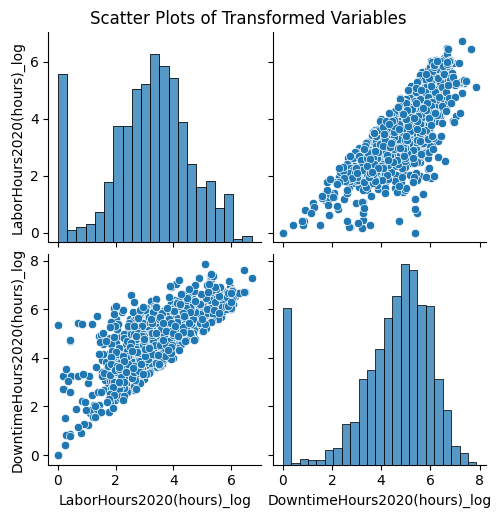

In [ ]:
# Bivariate Analysis of Labourhours and Downtime hours
labour_and_downtime = fleet_df[[ 'LaborHours2020(hours)_log', 'DowntimeHours2020(hours)_log']]

# Plotting scatter plots for each pair of the new variables
sns.pairplot(labour_and_downtime)
plt.suptitle('Scatter Plots of Transformed Variables', y=1.02)  # Adjust title position
plt.show()

<ipython-input-25-c700134b6264>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fleet_df.corr()


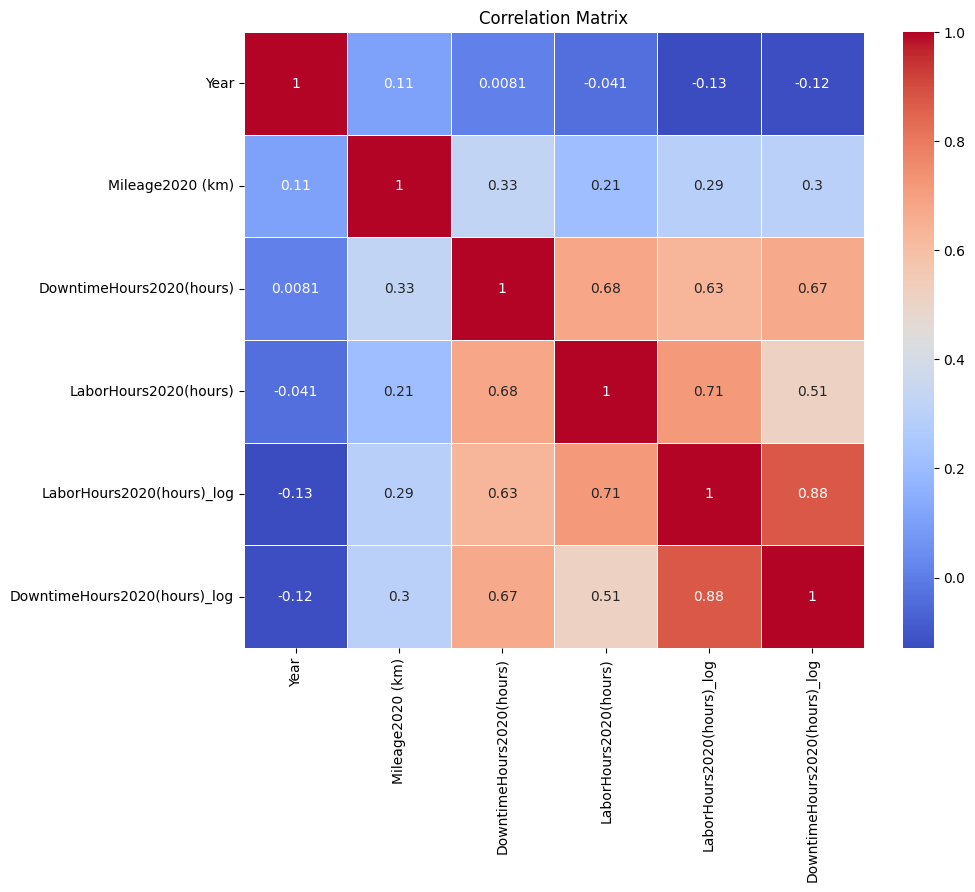

In [ ]:
# Calculate the correlation matrix
correlation_matrix = fleet_df.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## fleet composition by service group

<ipython-input-26-b4b59ae3cf29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fleet_composition_by_service_group.values, y=fleet_composition_by_service_group.index, palette="coolwarm")


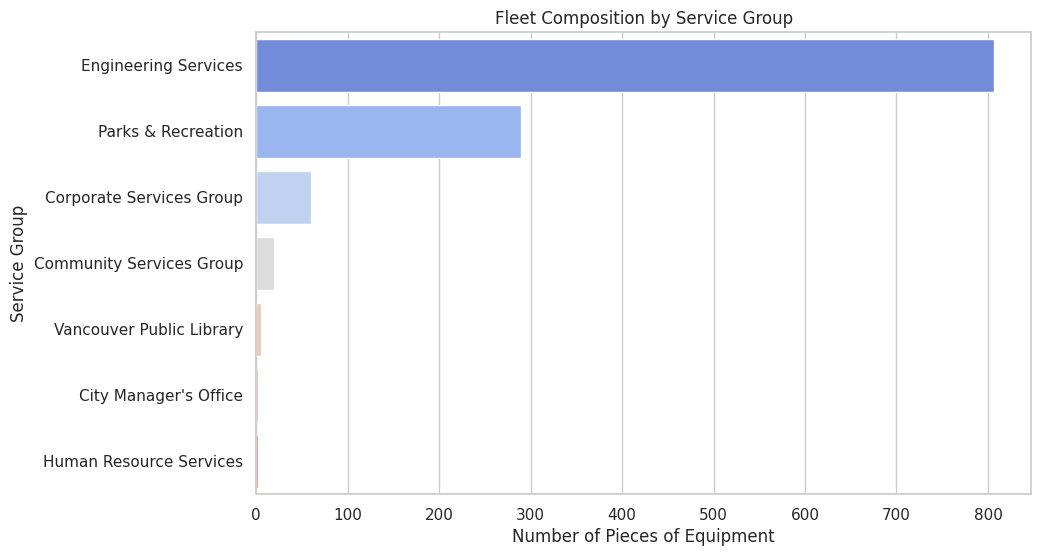

In [ ]:
# Calculate the fleet composition by service group
fleet_composition_by_service_group = fleet_df['Service Group'].value_counts()

# Set the visualization style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=fleet_composition_by_service_group.values, y=fleet_composition_by_service_group.index, palette="coolwarm")
plt.title('Fleet Composition by Service Group')
plt.xlabel('Number of Pieces of Equipment')
plt.ylabel('Service Group')

# Show the plot
plt.show()

## Engineering Services only

<ipython-input-27-cd66ad99977c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fleet_composition_by_department.values, y=fleet_composition_by_department.index, palette="viridis")


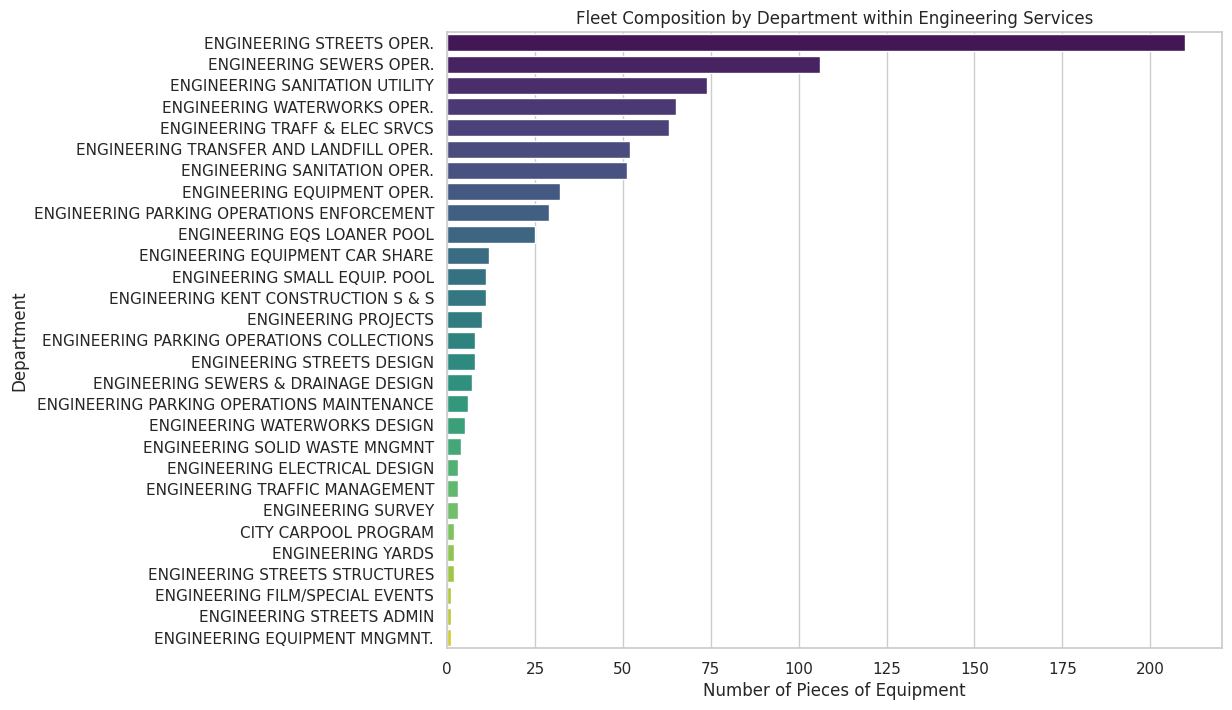

In [ ]:
# Filter the dataset for Engineering Services only
engineering_services = fleet_df[fleet_df['Service Group'] == 'Engineering Services']

# Calculate the fleet composition by department within Engineering Services
fleet_composition_by_department = engineering_services['Department'].value_counts()

# Set the visualization style
sns.set(style="whitegrid")

# Create a bar chart for the departments within Engineering Services
plt.figure(figsize=(10, 8))
sns.barplot(x=fleet_composition_by_department.values, y=fleet_composition_by_department.index, palette="viridis")
plt.title('Fleet Composition by Department within Engineering Services')
plt.xlabel('Number of Pieces of Equipment')
plt.ylabel('Department')

# Show the plot
plt.show()

## fleet composition by equipment category

<ipython-input-28-bd4aceb35e7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fleet_composition_by_category.values, y=fleet_composition_by_category.index, palette="coolwarm")


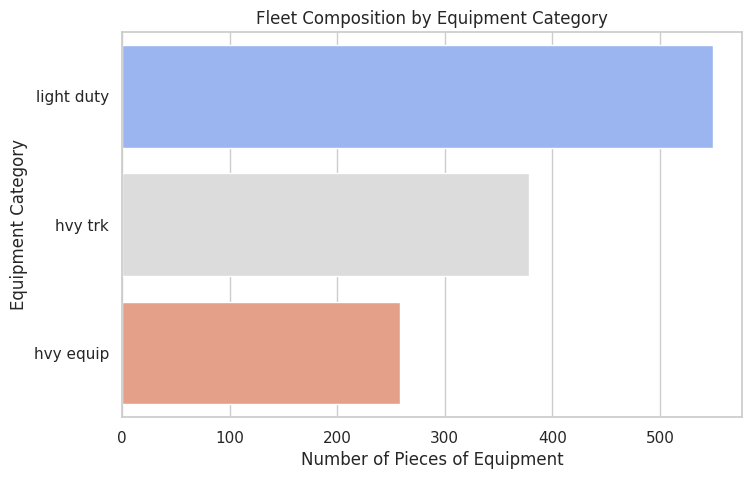

light duty    549
hvy trk       378
hvy equip     258
Name: Equipment Category, dtype: int64


In [ ]:
# Calculate the fleet composition by equipment category
fleet_composition_by_category = fleet_df['Equipment Category'].value_counts()

# Set the visualization style
sns.set(style="whitegrid")

# Create a bar chart for the equipment categories
plt.figure(figsize=(8, 5))
sns.barplot(x=fleet_composition_by_category.values, y=fleet_composition_by_category.index, palette="coolwarm")
plt.title('Fleet Composition by Equipment Category')
plt.xlabel('Number of Pieces of Equipment')
plt.ylabel('Equipment Category')

# Show the plot
plt.show()
print(fleet_composition_by_category)

## Group the data by 'Service Group' and calculate the total mileage

<ipython-input-29-9921071c2274>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mileage2020 (km)', y='Service Group', data=total_mileage_by_group, palette='coolwarm')


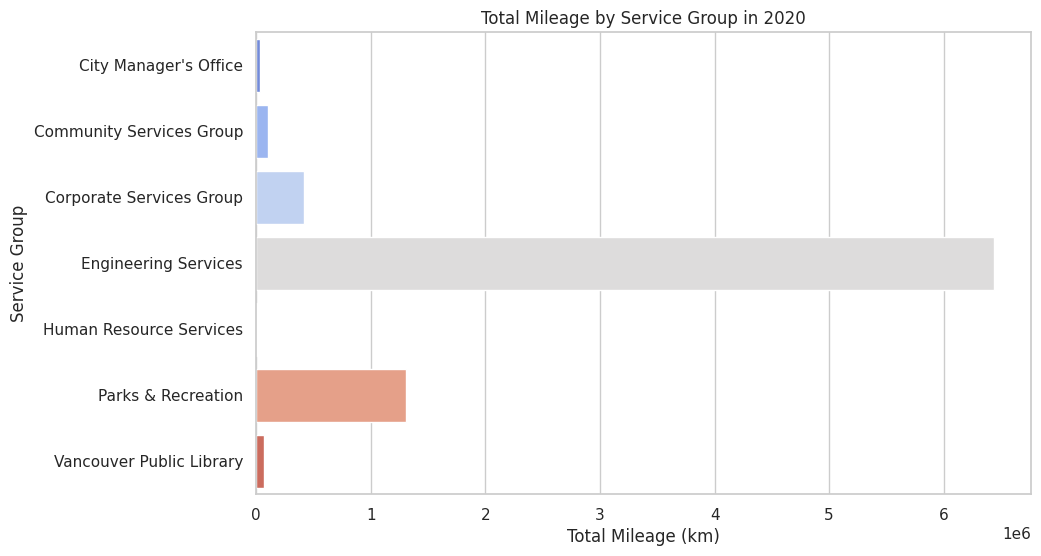

In [ ]:
# Group the data by 'Service Group' and calculate the total mileage
total_mileage_by_group = fleet_df.groupby('Service Group')['Mileage2020 (km)'].sum().reset_index()

# Plotting total mileage by Service Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Mileage2020 (km)', y='Service Group', data=total_mileage_by_group, palette='coolwarm')
plt.title('Total Mileage by Service Group in 2020')
plt.xlabel('Total Mileage (km)')
plt.ylabel('Service Group')
plt.show()


## Group by Department and calculate total mileage

<ipython-input-30-79fc5d86aea1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_mileage_by_department.values, y=total_mileage_by_department.index, palette="viridis")


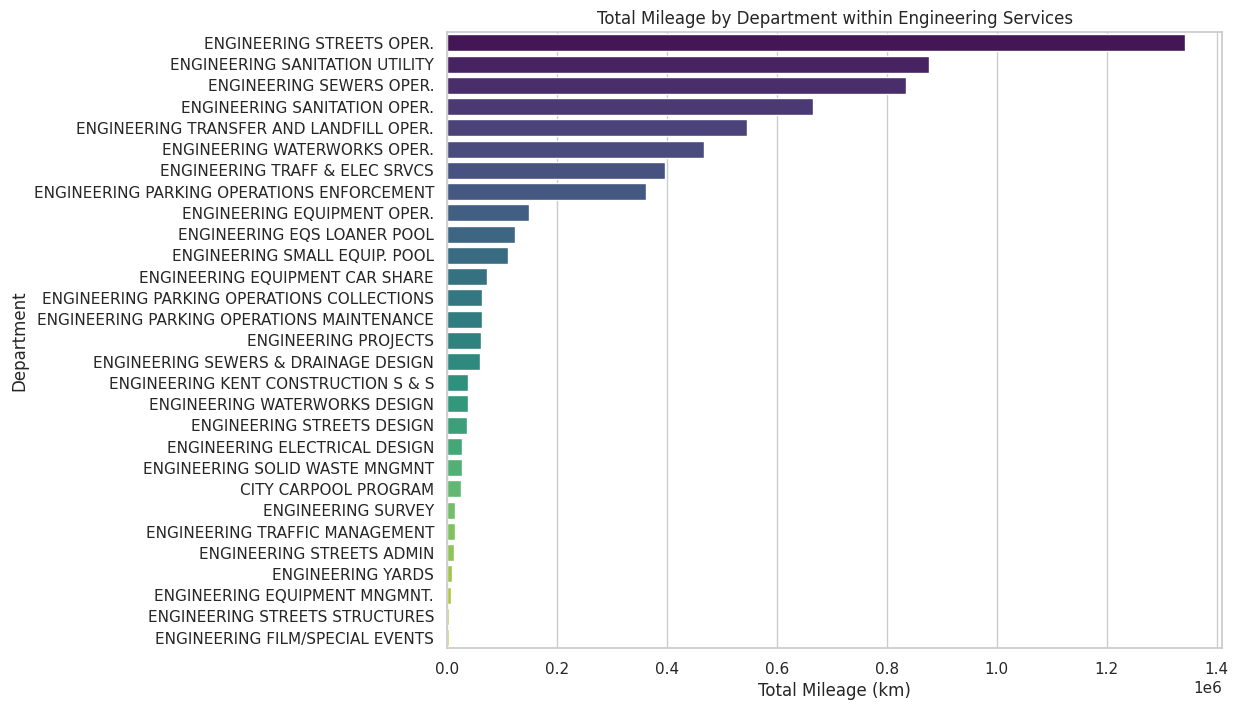

In [ ]:
# Group by Department and calculate total mileage


# Aggregate total mileage by department within Engineering Services
total_mileage_by_department = engineering_services.groupby('Department')['Mileage2020 (km)'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=total_mileage_by_department.values, y=total_mileage_by_department.index, palette="viridis")
plt.title('Total Mileage by Department within Engineering Services')
plt.xlabel('Total Mileage (km)')
plt.ylabel('Department')

plt.show()

##Aggregate total labor hours by service group

<ipython-input-31-c081b005b5be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_labor_hours_by_group.values, y=total_labor_hours_by_group.index, palette="coolwarm")


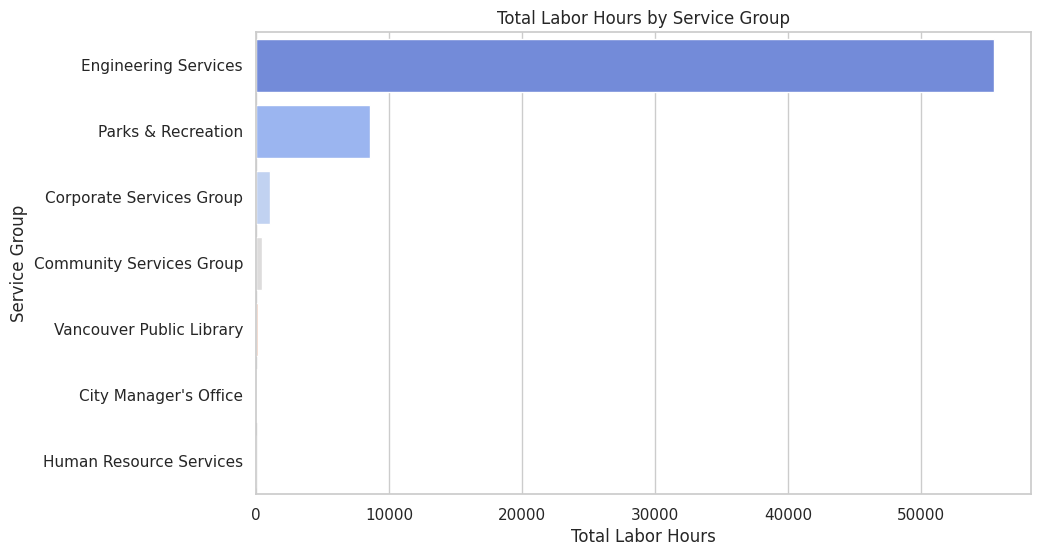

In [ ]:
# Aggregate total labor hours by service group
total_labor_hours_by_group = fleet_df.groupby('Service Group')['LaborHours2020(hours)'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=total_labor_hours_by_group.values, y=total_labor_hours_by_group.index, palette="coolwarm")
plt.title('Total Labor Hours by Service Group')
plt.xlabel('Total Labor Hours')
plt.ylabel('Service Group')

plt.show()

## Aggregate total downtime hours by service group

<ipython-input-32-8d4a40cd37c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_downtime_hours_by_group.values, y=total_downtime_hours_by_group.index, palette="mako")


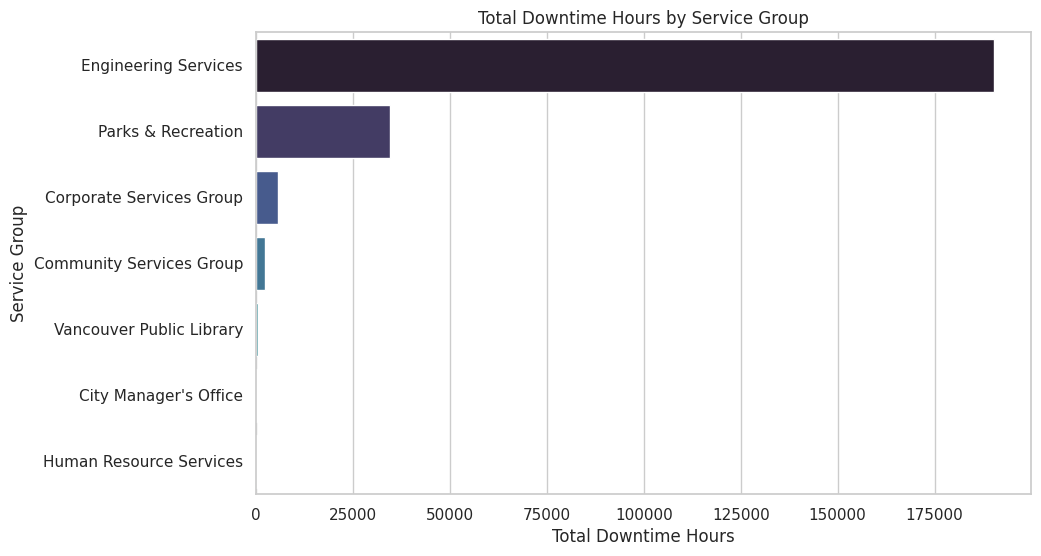

In [ ]:
# Aggregate total downtime hours by service group
total_downtime_hours_by_group = fleet_df.groupby('Service Group')['DowntimeHours2020(hours)'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=total_downtime_hours_by_group.values, y=total_downtime_hours_by_group.index, palette="mako")
plt.title('Total Downtime Hours by Service Group')
plt.xlabel('Total Downtime Hours')
plt.ylabel('Service Group')

plt.show()

##Aggregate total values by equipment category

In [ ]:
# Aggregate total values by equipment category
totals_by_category = fleet_df.groupby('Equipment Category').agg({
    'Mileage2020 (km)': 'sum',
    'LaborHours2020(hours)': 'sum',
    'DowntimeHours2020(hours)': 'sum'
}).reset_index()
print(totals_by_category)

  Equipment Category  Mileage2020 (km)  LaborHours2020(hours)  \
0          hvy equip               0.0            14606.71859   
1            hvy trk         3780306.4            40609.45484   
2         light duty         4587632.6            10475.05537   

   DowntimeHours2020(hours)  
0              48321.835733  
1             126816.381013  
2              58596.435252  


##Plotting Total Mileage by Equipment Category

<ipython-input-34-e63a9f9961cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mileage2020 (km)', y='Equipment Category', data=totals_by_category, palette='Blues_d')


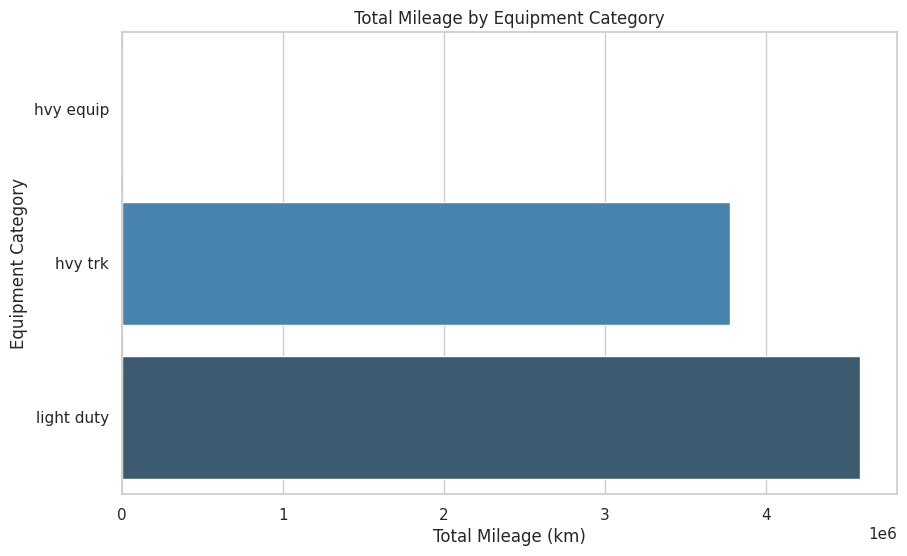

In [ ]:
# Plotting Total Mileage by Equipment Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Mileage2020 (km)', y='Equipment Category', data=totals_by_category, palette='Blues_d')
plt.title('Total Mileage by Equipment Category')
plt.xlabel('Total Mileage (km)')
plt.ylabel('Equipment Category')
plt.show()

## Plotting Total Labor Hours by Equipment Category



<ipython-input-35-7edf1e0a8a70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LaborHours2020(hours)', y='Equipment Category', data=totals_by_category, palette='Greens_d')


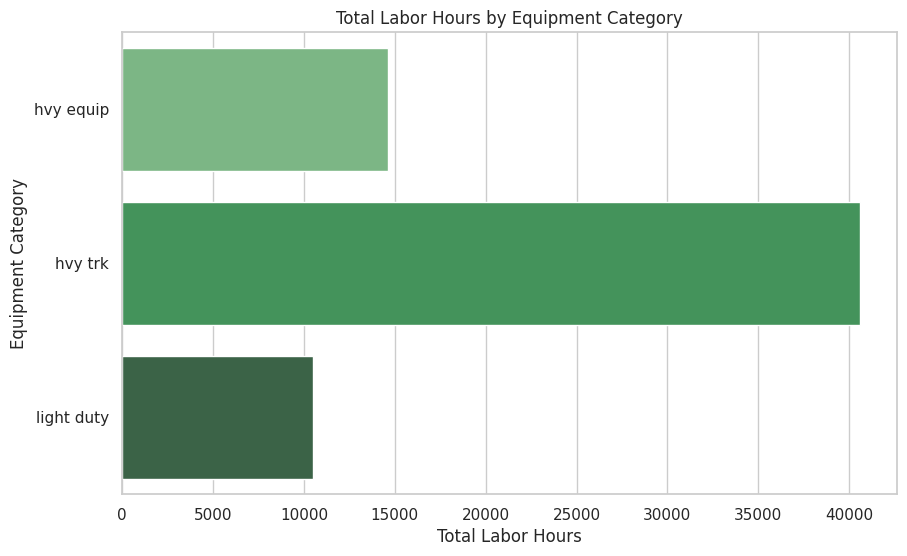

In [ ]:
# Plotting Total Labor Hours by Equipment Category
plt.figure(figsize=(10, 6))
sns.barplot(x='LaborHours2020(hours)', y='Equipment Category', data=totals_by_category, palette='Greens_d')
plt.title('Total Labor Hours by Equipment Category')
plt.xlabel('Total Labor Hours')
plt.ylabel('Equipment Category')
plt.show()


##Plotting Total Downtime Hours by Equipment Category

<ipython-input-36-86a24c3ab27c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DowntimeHours2020(hours)', y='Equipment Category', data=totals_by_category, palette='Reds_d')


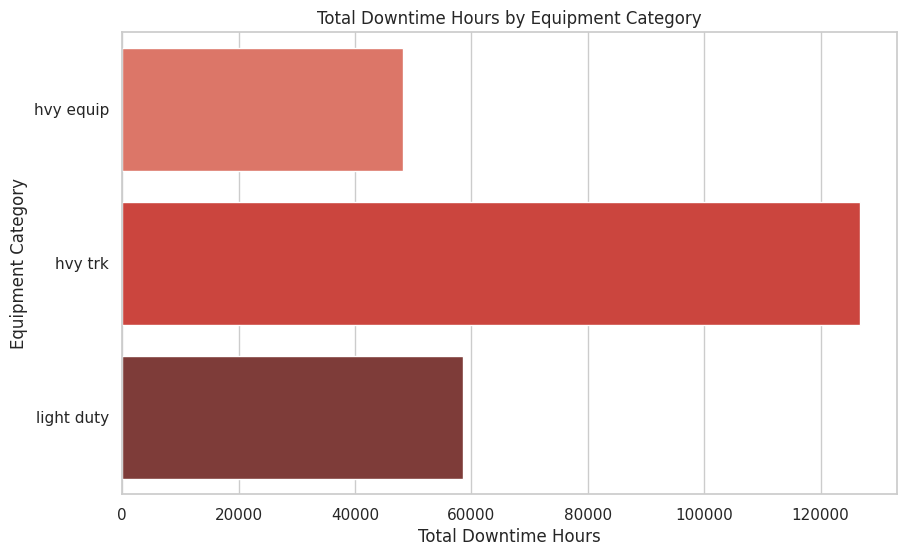

In [ ]:
# Plotting Total Downtime Hours by Equipment Category
plt.figure(figsize=(10, 6))
sns.barplot(x='DowntimeHours2020(hours)', y='Equipment Category', data=totals_by_category, palette='Reds_d')
plt.title('Total Downtime Hours by Equipment Category')
plt.xlabel('Total Downtime Hours')
plt.ylabel('Equipment Category')
plt.show()

# Importing secondary dataset to get CO2 emission

In [ ]:
df_1995_2004= pd.read_csv('/content/my1995-2004-fuel-consumption-ratings-5-cycle.csv')
df_2005_2014 = pd.read_csv('/content/my2005-2014-fuel-consumption-ratings-5-cycle.csv')
df_2015_2019 = pd.read_csv('/content/my2015-2019-fuel-consumption-ratings.csv')

In [ ]:
# Concatenate the datasets vertically
df_combined = pd.concat([df_1995_2004, df_2005_2014, df_2015_2019])

In [ ]:
# Remove the CO2 rating and Smog rating columns
df_combined_filtered = df_combined.drop(columns=['CO2 rating', 'Smog rating'])

# Reset index of the combined dataframe
df_combined_filtered.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned and combined dataset to verify
print(df_combined_filtered.head())

   Model year   Make         Model Vehicle class  Engine size (L)  Cylinders  \
0        1995  Acura       Integra    Subcompact              1.8          4   
1        1995  Acura       Integra    Subcompact              1.8          4   
2        1995  Acura  Integra GS-R    Subcompact              1.8          4   
3        1995  Acura        Legend       Compact              3.2          6   
4        1995  Acura  Legend Coupe       Compact              3.2          6   

  Transmission Fuel type  City (L/100 km)  Highway (L/100 km)  \
0           A4         X             11.6                 8.3   
1           M5         X             11.0                 8.3   
2           M5         Z             10.8                 8.3   
3           A4         Z             14.2                10.5   
4           A4         Z             14.6                11.0   

   Combined (L/100 km)  Combined (mpg)  CO2 emissions (g/km)  
0                 10.1              28                   232  
1 

## Using the light duty in the equipment category

In [ ]:
# Filter the DataFrame to keep only entries classified as "light duty" in the "Equipment Category"
df_light_duty_only = fleet_df[fleet_df['Equipment Category'] == 'light duty']

# Display the first few rows of the filtered DataFrame to confirm that only light duty equipment is included
print(df_light_duty_only.head())

  Equipment Number                  Equipment Class Equipment Category  \
0             A0006          VAN, MINI, 7 PASSENGER         light duty   
1             A0128  AUTO, PASSENGER, COMPACT WAGON         light duty   
2             A0129  AUTO, PASSENGER, MICRO COMPACT         light duty   
3             A0131  AUTO, PASSENGER, MICRO COMPACT         light duty   
4             A0149  AUTO, PASSENGER, COMPACT WAGON         light duty   

          Service Group                       Department      Make     Model  \
0  Engineering Services  ENGINEERING EQUIPMENT CAR SHARE      FORD  WINDSTAR   
1  Engineering Services         ENGINEERING SEWERS OPER.      FORD     FOCUS   
2  Engineering Services     ENGINEERING SANITATION OPER.  MERCEDES    SMARTC   
3  Engineering Services  ENGINEERING EQUIPMENT CAR SHARE  MERCEDES    SMARTC   
4  Engineering Services        ENGINEERING STREETS OPER.      FORD     FOCUS   

   Year                          Site  Mileage2020 (km)  \
0  2003  CROSSR

In [ ]:
df_light_duty_only.describe()

,Year,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours),LaborHours2020(hours)_log,DowntimeHours2020(hours)_log
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,2007.016393,8356.343534,106.733033,19.080247,2.535763,3.944575
std,4.376207,6993.091529,122.026721,19.276101,1.086724,1.495904
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,4038.000000,25.248889,6.703060,2.041618,3.267624
50%,2006.000000,7098.000000,65.727500,13.728080,2.689756,4.200617
75%,2012.000000,10285.000000,143.764167,26.205850,3.303432,4.975106
max,2015.000000,59592.000000,1071.692763,137.942520,4.934060,6.977927


In [ ]:
df_light_duty_only.describe(include = ['O'])

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Site
count,549,549,549,549,549,549,549,549
unique,549,36,1,7,48,13,41,43
top,A0006,"TRUCK, PICKUP, HEAVY",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,F150,MANITOBA YD. (250 W. 70TH)
freq,1,72,549,354,57,425,68,145


In [ ]:
# Remove rows with a 'Model year' greater than 2015
df_combined_filtered_year = df_combined_filtered[df_combined_filtered['Model year'] <= 2015]

## Aggregate the data by year and make to get the average CO2 emissions

In [ ]:
# Aggregate the data by year and make to get the average CO2 emissions
average_co2_emissions = df_combined_filtered_year.groupby(['Model year', 'Make'])['CO2 emissions (g/km)'].mean().reset_index()

# Rename the column for clarity
average_co2_emissions.rename(columns={'CO2 emissions (g/km)': 'Average CO2 emissions (g/km)'}, inplace=True)


# Display the first few rows of the aggregated data to verify
print(average_co2_emissions.head())

   Model year        Make  Average CO2 emissions (g/km)
0        1995       Acura                    269.375000
1        1995  Alfa Romeo                    324.500000
2        1995        Audi                    289.888889
3        1995         BMW                    286.583333
4        1995     Bentley                    489.625000


## Define the mapping for make names

In [ ]:
# Define the mapping for make names
make_name_mapping = {
    'ACURA': 'Acura',
    'DODGE': 'Dodge',
    'FORD': 'Ford',
    'GENERAL MOTORS': 'GMC',
    'MERCEDES': 'Mercedes-Benz',
    'MITSUBISHI': 'Mitsubishi',
    'NISSAN': 'Nissan',
    'SMART': 'smart',
    'TOYOTA': 'Toyota',
    'VOLKSWAGEN': 'Volkswagen',
    'YAMAHA': 'Yamaha', # Yamaha might not match if it's primarily motorcycles
    'EVT': 'EVT' # Special case, might not have a direct match
}

# Apply the mapping to correct the 'Make' names in the light-duty dataset
df_light_duty_only['Make'] = df_light_duty_only['Make'].apply(lambda x: make_name_mapping.get(x, x))

# Optionally, you can also apply corrections or mapping to the combined CO2 dataset if needed

# Verification: Check unique 'Make' names after correction
unique_makes_after_correction = df_light_duty_only['Make'].unique()

# Display the unique 'Make' names after correction
unique_makes_after_correction

<ipython-input-45-b01d8e4553af>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_light_duty_only['Make'] = df_light_duty_only['Make'].apply(lambda x: make_name_mapping.get(x, x))


array(['Ford', 'Mercedes-Benz', 'Mitsubishi', 'Toyota', 'GMC', 'Yamaha',
       'Dodge', 'smart', 'Nissan', 'Volkswagen', 'Acura', 'EVT'],
      dtype=object)

In [ ]:
df_light_duty_only[df_light_duty_only['Make'] == 'Yamaha']

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours),LaborHours2020(hours)_log,DowntimeHours2020(hours)_log
99,A2503,"CART, ELEC, PERSONNEL",light duty,Engineering Services,ENGINEERING YARDS,Yamaha,G-MAX G-22E,2006,MANITOBA YD. (250 W. 70TH),8793.4,202.951112,33.45140,3.539550,5.317880
347,B2505,"CART, ELEC, PERSONNEL",light duty,Engineering Services,ENGINEERING EQUIPMENT OPER.,Yamaha,G16,2006,MANITOBA YD. (250 W. 70TH),8263.4,220.990278,18.53695,2.972308,5.402634


In [ ]:
#dropping yamaha
df_light_duty_only.drop([99,347], axis = 0, inplace= True)

<ipython-input-47-1ce8a5126137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_light_duty_only.drop([99,347], axis = 0, inplace= True)


In [ ]:
df_light_duty_only[df_light_duty_only['Make'] == 'EVT']

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours),LaborHours2020(hours)_log,DowntimeHours2020(hours)_log
1183,V12531,"SCOOTER, ELECTRIC",light duty,Engineering Services,ENGINEERING PROJECTS,EVT,4000E,2011,CROSSROADS (507 W. BROADWAY),6655.4,36.787221,7.39776,2.127965,3.631971


In [ ]:
#dropping the EVT
df_light_duty_only.drop(1183, axis = 0, inplace= True)

<ipython-input-49-4a5b498bd64c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_light_duty_only.drop(1183, axis = 0, inplace= True)


In [ ]:
unique_makes_after_removal = df_light_duty_only['Make'].unique()
print(unique_makes_after_removal)

['Ford' 'Mercedes-Benz' 'Mitsubishi' 'Toyota' 'GMC' 'Dodge' 'smart'
 'Nissan' 'Volkswagen' 'Acura']


In [ ]:
average_co2_emissions.rename(columns={'CO2 emissions (g/km)': 'Average CO2 emissions (g/km)', 'Model year': 'Year'}, inplace=True)

light_duty_with_co2 = pd.merge(df_light_duty_only, average_co2_emissions, on=['Make', 'Year'], how='left')

# Display the first few rows to verify the merge
light_duty_with_co2.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2020 (km),DowntimeHours2020(hours),LaborHours2020(hours),LaborHours2020(hours)_log,DowntimeHours2020(hours)_log,Average CO2 emissions (g/km)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,Ford,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,740.432781,102.75251,4.642008,6.608585,317.273973
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,Ford,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,29.510834,4.07029,1.623398,3.418082,315.772727
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,Mercedes-Benz,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,4.696111,3.21806,1.439375,1.739784,333.857143
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,Mercedes-Benz,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,412.597220,54.35750,4.013812,6.024893,333.857143
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,Ford,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,89.826946,15.17277,2.783329,4.508956,295.612245


In [ ]:
light_duty_with_co2.shape

(546, 15)

In [ ]:
light_duty_with_co2.isna().sum()

Equipment Number                0
Equipment Class                 0
Equipment Category              0
Service Group                   0
Department                      0
Make                            0
Model                           0
Year                            0
Site                            0
Mileage2020 (km)                0
DowntimeHours2020(hours)        0
LaborHours2020(hours)           0
LaborHours2020(hours)_log       0
DowntimeHours2020(hours)_log    0
Average CO2 emissions (g/km)    0
dtype: int64

In [ ]:
light_duty_with_co2.to_csv('light_duty_fleet.csv')

<ipython-input-55-10860bdabcb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = light_duty_with_co2.corr()


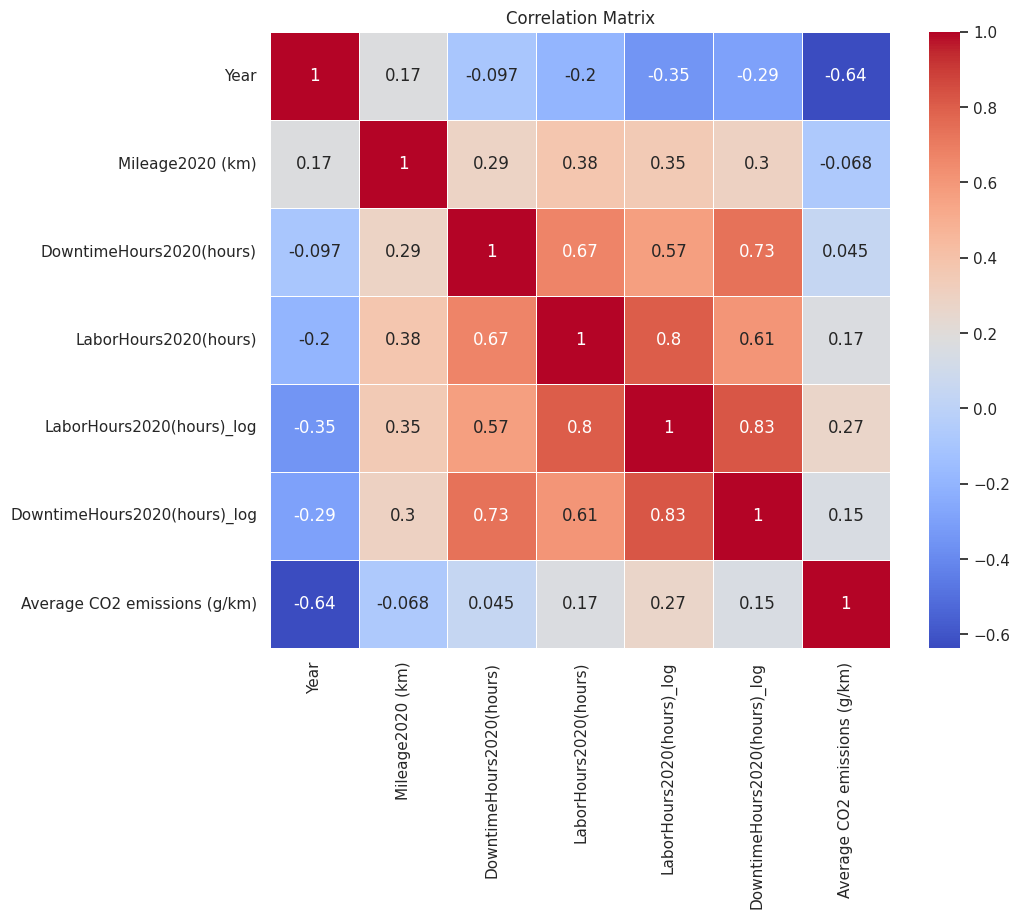

In [ ]:
# Calculate the correlation matrix
correlation_matrix2 = light_duty_with_co2.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate total CO2 emissions for each department in 2020
light_duty_with_co2['Total CO2 Emissions 2020 (g)'] = light_duty_with_co2['Mileage2020 (km)'] * light_duty_with_co2['Average CO2 emissions (g/km)']

# Aggregate total emissions by department
department_emissions_2020 = light_duty_with_co2.groupby('Department')['Total CO2 Emissions 2020 (g)'].sum().reset_index()

# Calculate the grand total of CO2 emissions in 2020 and the target reduction for 2024
total_emissions_2020 = department_emissions_2020['Total CO2 Emissions 2020 (g)'].sum()
target_emissions_2024 = total_emissions_2020 * 0.8 # Target is a 20% reduction

# Calculate the reduction required for each department to achieve the target
department_emissions_2020['Required Reduction (g)'] = department_emissions_2020['Total CO2 Emissions 2020 (g)'] * 0.2

# Calculate the new target emissions for each department for 2024
department_emissions_2020['Target Emissions 2024 (g)'] = department_emissions_2020['Total CO2 Emissions 2020 (g)'] * 0.8

# Sort departments by the amount of reduction required
department_emissions_2020_sorted = department_emissions_2020.sort_values(by='Required Reduction (g)', ascending=False).reset_index(drop=True)

# Display the top departments that need to reduce their emissions
print(department_emissions_2020_sorted[['Department', 'Total CO2 Emissions 2020 (g)', 'Required Reduction (g)', 'Target Emissions 2024 (g)']].head())

                            Department  Total CO2 Emissions 2020 (g)  \
0         ENGINEERING SANITATION OPER.                  1.265773e+08   
1            ENGINEERING STREETS OPER.                  1.186138e+08   
2             ENGINEERING SEWERS OPER.                  1.183714e+08   
3   PARK BOARD PLANNING AND OPERATIONS                  1.178177e+08   
4  REAL ESTATE & FACILITIES MANAGEMENT                  1.007883e+08   

   Required Reduction (g)  Target Emissions 2024 (g)  
0            2.531547e+07               1.012619e+08  
1            2.372277e+07               9.489108e+07  
2            2.367428e+07               9.469712e+07  
3            2.356354e+07               9.425416e+07  
4            2.015766e+07               8.063064e+07  


#Random Forest

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Convert categorical columns to strings directly
light_duty_with_co2['Make'] = light_duty_with_co2['Make'].astype(str)
light_duty_with_co2['Model'] = light_duty_with_co2['Model'].astype(str)
light_duty_with_co2['Service Group'] = light_duty_with_co2['Service Group'].astype(str)

# Select features and target variable
X = light_duty_with_co2[['Year', 'Make', 'Model', 'Service Group', 'Mileage2020 (km)', 'DowntimeHours2020(hours)', 'LaborHours2020(hours)']]
y = light_duty_with_co2['Average CO2 emissions (g/km)']

# Define categorical and numerical features
categorical_features = ['Make', 'Model', 'Service Group']
numerical_features = ['Year', 'Mileage2020 (km)', 'DowntimeHours2020(hours)', 'LaborHours2020(hours)']

# Use ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_rf}")

# Calculate the R^2 Score
r2_rf = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2_rf:.4f}")

# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")


Mean Squared Error (MSE): 14.510136980396709
R^2 Score: 0.9897
Mean Absolute Percentage Error (MAPE): 0.44%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (MSE): {-grid_search.best_score_}")

# Use the best estimator for further predictions
best_rf = grid_search.best_estimator_

# Optionally, evaluate the best model on the test data
y_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_MAPE = mean_absolute_percentage_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {test_MAPE:.2f}%")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score (MSE): 17.000249371824708
Test MSE: 17.29408753637539
Test R^2: 0.9876795684507761
Mean Absolute Percentage Error (MAPE): 0.47%
